In [1]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

# Applications of Graph Theory and Dynamic Mode Decomposition to the Bitcoin Trust Network
## Robert Simpson
### 9/23/2020

Data-set: https://snap.stanford.edu/data/soc-sign-bitcoin-otc.html

S. Kumar, F. Spezzano, V.S. Subrahmanian, C. Faloutsos. Edge Weight Prediction in Weighted Signed Networks. IEEE International Conference on Data Mining (ICDM), 2016. https://bitcoin-otc.com/

In economic terms we may be interested in to whom, how quickly, and in what magnitude money flows. This has heavy implications in long term economic output. The Russian economist Wassily Leontief developed a model of monetary flow through the system of production. He conjectured that computers would eventually be powerful enough to solve the prodution problem as a simple linear algebra problem. 

Graph theory has the potential to offer insight in a meaningful way of how money flows through communities and sub-communities. The dollar is very difficult to track through the economy without specialized means to access the data of thousands of companies and individuals. 

The bitcoin trust network tracks transactions of bitcoins over the internet. The blockchain itself anoymysizes all of the transaction data, but the data is freely given by individuals who want to have a record of good faith.

In [2]:
column_names = ['Source','Target','Rating','Time']
file_name = 'C:/Users/Robert/PycharmProjects/NetworkTheory/OtherData/soc-sign-bitcoinalpha.csv'
df = pd.read_csv(file_name, names = column_names).sort_index(ascending=True)
time_values = df['Time'].unique()

print('We have', time_values.shape[0] , 'points in time in total.')
print(df.head())

We have 1647 points in time in total.
   Source  Target  Rating        Time
0    7188       1      10  1407470400
1     430       1      10  1376539200
2    3134       1      10  1369713600
3    3026       1      10  1350014400
4    3010       1      10  1347854400


Source denotes the bitcoin sender, and target denotes the reciver. Every transaction carries with it a weight denoted by weighting. Additionally all edges are temporal meaning they occur at a specific time. 

### Summary of Data Analysis Below:

Below we generate new graphs at teach time t showing flow-paths of Bitcoin through the trust network community. We then examine the data for large consumers/sellers. The data below confirms the appearance of large outlier bitcoin users.

From the graphs above we can extrapolate a few things about the dynamics of the Bitcoin Trust Network. The majority of bitcoin users only send or recieve bitcoin a few times. There are however a few senders/buyers who have 100+ transactions. These users generate a massive largest connected component. 

Points of interest:

- There is a significant correlation between additions of edges and nodes. Given that all new transactions must have a credit and debit this isn't surprising.  

- However over time we see that edges populate between existing nodes meaning we have less entry into the bitcoin trust network and greater circulation of bitcoin between existing community members. 

- Given that there are less entries over time we see that the velocity of the max degree begins to decrease the further out in time we go. The velocity of the max degree relative to the nodes or edges begins to approach zero as time approaches infinity. 

Summary of Graph at time t = 600:
Name: 
Type: Graph
Number of nodes: 1577
Number of edges: 2862
Average degree:   3.6297

The greatest degree at time = 10 is 124.
The greatest degree at time = 50 is 332.
The greatest degree at time = 100 is 498.
The greatest degree at time = 200 is 745.

The correlation coeffecient between node count and edge count is 0.99
The covariance coeffecient between node count and LCC_degree is 5445672.72


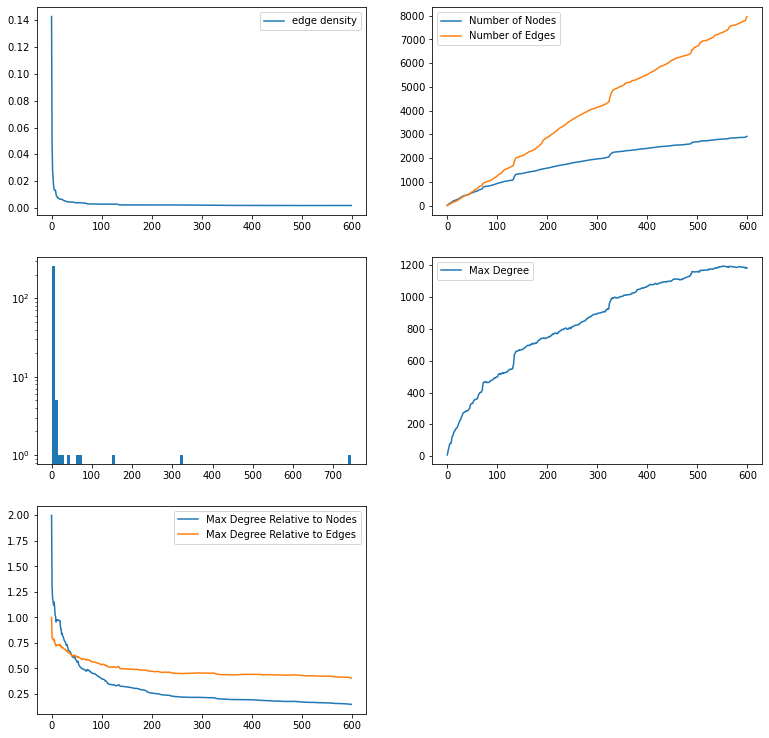

In [109]:
max_time = 600
dynamic_edge_density = np.zeros(max_time)
node_count = np.zeros(max_time)
edge_count = np.zeros(max_time)
largest_connected_node_degree = np.zeros(max_time)
Graph = pd.DataFrame(columns = column_names) 

for i in range(0,max_time):
    time = time_values[i]
    G = df[df['Time'] == time]
    Graph = pd.concat([Graph, G])
    Graphtype = nx.Graph()
    GG = nx.from_pandas_edgelist(Graph, source='Source' , target='Target' , edge_attr='Rating', create_using=Graphtype)
    dynamic_edge_density[i] = nx.density(GG)
    node_count[i] = nx.number_of_nodes(GG)
    edge_count[i] = nx.number_of_edges(GG)
    largest_connected_node_degree[i] = max(nx.degree_histogram(GG))
    
    # We will use these specific graphs to later to graph the largest connected component
    if i == 10:
        GG10 = GG
    if i == 50:
        GG50 = GG
    if i == 100:
        GG100 = GG
    if i == 200:
        GG200 = GG    

histogram = nx.degree_histogram(GG200); 
summary = nx.info(GG200)

print('Summary of Graph at time t = %.d:' %max_time)
print(summary)
print()
print('The greatest degree at time = 10 is %.d.' %max(nx.degree_histogram(GG10)))
print('The greatest degree at time = 50 is %.d.' %max(nx.degree_histogram(GG50)))
print('The greatest degree at time = 100 is %.d.' %max(nx.degree_histogram(GG100)))
print('The greatest degree at time = 200 is %.d.' %max(nx.degree_histogram(GG200)))
print()
print('The correlation coeffecient between node count and edge count is %.2f' %np.corrcoef(node_count,edge_count)[1,0])
print('The covariance coeffecient between node count and LCC_degree is %.2f' %np.cov(node_count,edge_count)[1,1])

fig = plt.figure(figsize = (13,13))
plt.subplot(321)
plt.plot(dynamic_edge_density, label = 'edge density')
plt.legend()

plt.subplot(322)
plt.plot(node_count, label = 'Number of Nodes')
plt.plot(edge_count, label = 'Number of Edges')
plt.legend()

plt.subplot(323)
plt.hist(histogram, bins=100, log=True);

plt.subplot(324)
plt.plot(largest_connected_node_degree, label = 'Max Degree');
plt.legend()

plt.subplot(325)
plt.plot(largest_connected_node_degree/edge_count, label = 'Max Degree Relative to Nodes');
plt.plot(largest_connected_node_degree/node_count, label = 'Max Degree Relative to Edges');
plt.legend()

### Largest Connected Component

Text(0.5, 1.0, 'Largest Connected Component at t = 200')

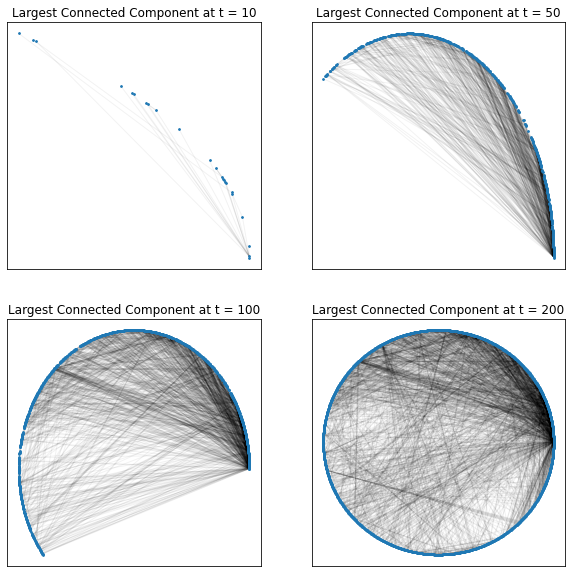

In [55]:
Gcc10 = sorted(nx.connected_components(GG10), key=len, reverse=True)
G10 = GG200.subgraph(Gcc10[0])
pos = nx.circular_layout(G10)

Gcc50 = sorted(nx.connected_components(GG50), key=len, reverse=True)
G50 = GG200.subgraph(Gcc50[0])
pos = nx.circular_layout(G50)

Gcc100 = sorted(nx.connected_components(GG100), key=len, reverse=True)
G100 = GG200.subgraph(Gcc100[0])
pos = nx.circular_layout(G100)

Gcc200 = sorted(nx.connected_components(GG200), key=len, reverse=True)
G200 = GG200.subgraph(Gcc200[0])
pos = nx.circular_layout(G200)

fig = plt.figure(figsize=(10,10))

plt.subplot(221)
nx.draw_networkx_nodes(G10, pos, node_size=3)
nx.draw_networkx_edges(G10, pos, arrows=True, alpha = 0.05)
plt.title('Largest Connected Component at t = 10')

plt.subplot(222)
nx.draw_networkx_nodes(G50, pos, node_size=3)
nx.draw_networkx_edges(G50, pos, arrows=True, alpha = 0.05)
plt.title('Largest Connected Component at t = 50')

plt.subplot(223)
nx.draw_networkx_nodes(G100, pos, node_size=3)
nx.draw_networkx_edges(G100, pos, arrows=True, alpha = 0.05)
plt.title('Largest Connected Component at t = 100')

plt.subplot(224)
nx.draw_networkx_nodes(G200, pos, node_size=3)
nx.draw_networkx_edges(G200, pos, arrows=True, alpha = 0.05)
plt.title('Largest Connected Component at t = 200')

### Early Overall Network Development

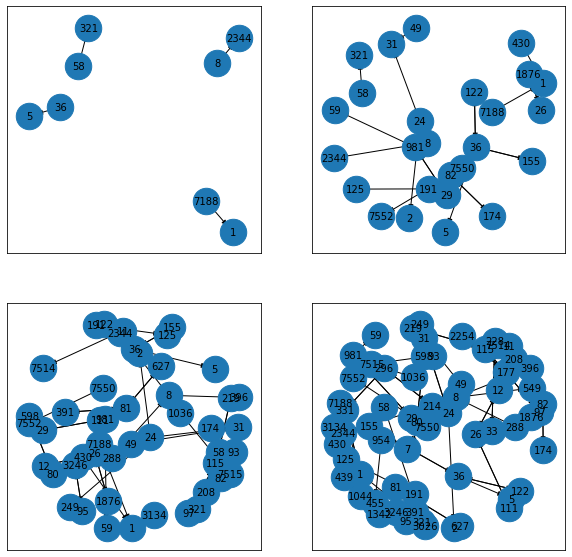

In [56]:

#we want to generate a graph at each time value.
#for t in TimeValues:

graph_time_0 = df[df['Time'] == time_values[0]]
graph_time_1 = df[df['Time'] == time_values[1]]
graph_time_2 = df[df['Time'] == time_values[2]]
graph_time_3 = df[df['Time'] == time_values[3]]

graph_dyn_1 = pd.concat([graph_time_1,graph_time_0])
graph_dyn_2 = pd.concat([graph_dyn_1,graph_time_2])
graph_dyn_3 = pd.concat([graph_dyn_2,graph_time_3])

graph_type = nx.DiGraph()

fig = plt.figure(figsize=(10,10))
plt.subplot(221)
G = nx.from_pandas_edgelist(graph_time_0,source='Source' , target='Target' , edge_attr='Rating', create_using= graph_type)
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, arrows=True)
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif");

plt.subplot(222)
G1 = nx.from_pandas_edgelist(graph_dyn_1,source='Source' , target='Target' , edge_attr='Rating', create_using=graph_type)
pos = nx.spring_layout(G1,k=0.7) 
nx.draw_networkx_nodes(G1, pos, node_size=700, k =0.9)
nx.draw_networkx_edges(G1,pos)
nx.draw_networkx_labels(G1, pos, font_size=10, nt_family="sans-serif");

plt.subplot(223)
G2 = nx.from_pandas_edgelist(graph_dyn_2,source='Source' , target='Target' , edge_attr='Rating', create_using=graph_type)
pos = nx.spring_layout(G2,k=0.7)  # positions for all nodes
nx.draw_networkx_nodes(G2, pos, node_size=700)
nx.draw_networkx_edges(G2, pos, arrows=True)
nx.draw_networkx_labels(G2, pos, font_size=10, font_family="sans-serif");

plt.subplot(224)
G3 = nx.from_pandas_edgelist(graph_dyn_3,source='Source' , target='Target' , edge_attr='Rating', create_using=graph_type)
pos = nx.spring_layout(G3, k=0.7)  # positions for all nodes
nx.draw_networkx_nodes(G3, pos, node_size=700)
nx.draw_networkx_edges(G3, pos, arrows=True)
nx.draw_networkx_labels(G3, pos, font_size=10, font_family="sans-serif");

# Counting Cycles
We want to understand how many closed cycles are in the graph. These cycles are a measure of the interconnectedness between senders and recievers of Bitcoin. 

An example of 3-cycle: 

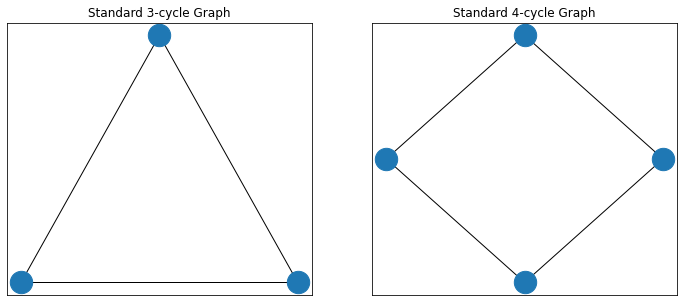

In [103]:
nodes = [1,2,3]
adjancency_matrix_3 = np.ones((3,3)) - np.diag(np.ones(3))
cycle3 = nx.from_numpy_array(adjancency_matrix_3, create_using=nx.MultiGraph)
adjancency_matrix_4 = np.ones((4,4)) - np.diag(np.ones(4)) - np.diag(np.ones(2),k=2) - np.diag(np.ones(2), k=-2)
                                                                                               
cycle4 = nx.from_numpy_array(adjancency_matrix_4, create_using=nx.MultiGraph)

fig = plt.figure(figsize = (12,5))
plt.subplot(121)
pos = nx.planar_layout(cycle3);
nx.draw_networkx_nodes(cycle3, pos, node_size=500, k =1);
nx.draw_networkx_edges(cycle3, pos, arrows=True, alpha = 1);
plt.title('Standard 3-cycle Graph');

plt.subplot(122)
pos = nx.shell_layout(cycle4);
nx.draw_networkx_nodes(cycle4, pos, node_size=500, k =1);
nx.draw_networkx_edges(cycle4, pos, arrows=True, alpha = 1);
plt.title('Standard 4-cycle Graph');

In [66]:
def subgraph_count(G):
    features_vector = np.zeros(9)
    size = G.number_of_nodes()
    dgs = np.zeros(size)
    ovec = np.zeros(size)
    dfvec = np.zeros(size)
    dftvec = np.zeros(size)
    
    dgs[:] = np.array([d for n, d in G.degree()])
    ovec[:] = np.ones(dgs.size)
    dfvec[:] = dgs[:] - ovec[:]
    dftvec[:] = dgs[:] - 2.*ovec[:]
    
    A = nx.adjacency_matrix(G)
    Af = A.todense()
    A2 = Af@Af
    A3 = Af@A2
    A4 = Af@A3
    A5 = Af@A4
    A6 = Af@A5
    A7 = Af@A6
    dfA = np.multiply(np.diag(dfvec)@Af,Af@np.diag(dfvec))
    dftA = np.multiply(np.diag(dftvec)@Af,Af@np.diag(dftvec))
    P1 = G.number_of_edges()            
    P2 = np.sum(np.multiply(dgs,dfvec))/2.
    
    features_vector[0] = np.trace(A3)/6. # n_G(C_3)   
    features_vector[1] = (np.trace(A4)-4.*P2-2.*P1)/8. # n_G(C_4)
    features_vector[2] = (np.trace(A5)-10*features_vector[5]-30*features_vector[0])/10. # n_G(C_5)
    features_vector[3] = np.sum(np.sum(dfA)) - 3.*features_vector[0] # n_G(H_3)       
    features_vector[4] = np.dot(np.multiply(dgs,dfvec),dftvec)/6. # n_G(H_4) 
    features_vector[5] = np.dot(np.diag(A3),dftvec)/2. # n_G(H_5)
    features_vector[6] = 1/2*np.sum(np.sum(np.multiply(np.multiply((A2-np.ones((A2.shape))),A2),Af))) # n_G(H_6)
    features_vector[7] = 1/4*np.dot(np.diag(A3),np.multiply(dfvec,dftvec-np.ones(dftvec.size))) # n_G(H_7)
    features_vector[8] = np.sum(np.sum(np.multiply(np.multiply(A2,dftA),Af))) - 2*features_vector[6] # n_G(H_8)
    return features_vector

In [67]:
features = np.zeros((9,time_values.shape[0]))
Graph = pd.DataFrame(columns = column_names) 

for t in np.arange(np.int(50)):
    time = time_values[t]
    G = df[df['Time'] == time]
    Graph = pd.concat([Graph, G])
    Graphtype = nx.Graph()
    GG = nx.from_pandas_edgelist(Graph, source='Source' , target='Target' , edge_attr='Rating', create_using=Graphtype)
    features_time_t = subgraph_count(GG)
    features[:,t] = features_time_t

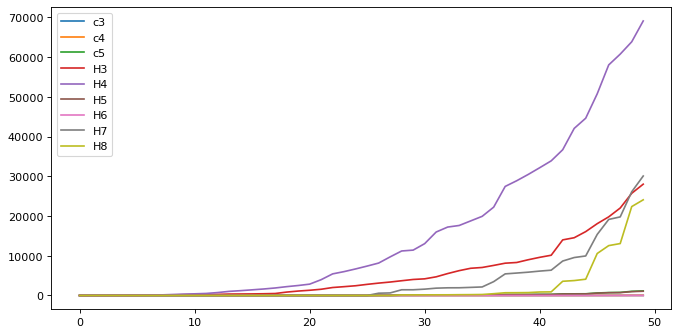

In [68]:
plt.figure(num=None, figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
for i in np.arange(features.shape[0]):
    plt.plot(np.arange(50),features[i,:50])
labels = ['c3', 'c4', 'c5','H3', 'H4', 'H5' ,'H6','H7','H8' ] 
plt.legend(labels)

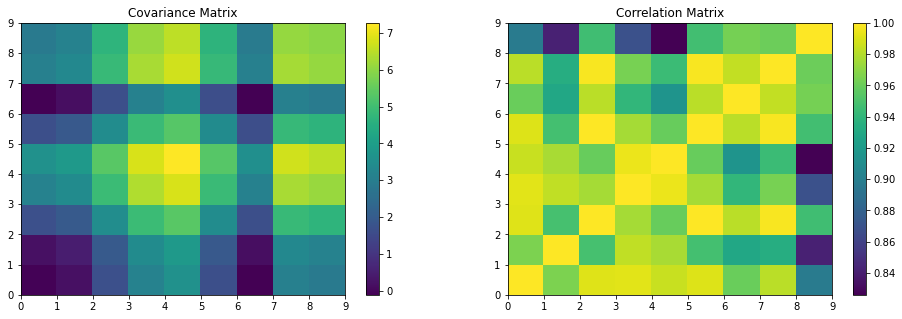

In [127]:
covariance_matrix = np.cov(features)
correlation_matrix = np.corrcoef(features)

fig = plt.figure(figsize=(16,5))
plt.subplot(121)
plt.pcolor( np.log10(covariance_matrix),cmap='viridis')
plt.colorbar();
plt.title('Covariance Matrix');

plt.subplot(122)
plt.pcolor((correlation_matrix),cmap='viridis')
plt.colorbar();
plt.title('Correlation Matrix');

# Understanding the Dynamics

Below we can use dynamic mode decomposition to approximate the Koopman modes. 

We have a series of snapshots in time giving us the features at each particular snapshot. We can form the snapshot matrix $X$ where,

$$
X = \{x_{1}, x_{2},\dots x_{n}\}
$$

where $x_{i}$ for $i = 1,2,3 \dots n$ represents a snapshot. 

We split the snapshot matrix such that:

$$
X_{+} = \{ x_{2},\dots x_{n}\} \quad X_{-} = \{x_{1}, x_{2},\dots x_{n-1}\}
$$

We then suppose that there exists some linear operator,specifically the Koopman Operator, $A$:

$$
X_{+} = A X_{-}
$$

$$
X_{+} = A U S V^{T}
$$

$$
U^{T}A U =  U^{T} X_{+} VS^{-1}
$$

Then A is related to the right hand side via a diagonal transformation and thus the eigenvalues and eigenvectors of the right hand side are equal to the eigenvectors and eigenvalues of $A$.

Let's go ahead and compute the koopman modes of our cyclical-graph count.

In [76]:
def dmd_computation(data, threshhold):
    rows, columns = data.shape
    data_average = np.matlib.repmat((np.mean(data,1)).reshape(rows,1),1,columns)
    fluctuations = data - data_average
    data_minus = fluctuations[:, :columns - 1]
    data_plus = fluctuations[:, 1:]

    u, s, vh = np.linalg.svd(data_minus, full_matrices=False)
    sm = np.max(s)
    indskp = np.log10(s/sm) > -threshhold
    sr = s[indskp]
    ur = u[:, indskp]
    v = np.conj(vh.T)
    vr = v[:, indskp]
    kmat = data_plus @ vr @ np.diag(1. / sr) @ np.conj(ur.T)
    eigenvalues, eigenvectors = np.linalg.eig(kmat)
    temporal_modes = (np.linalg.solve(eigenvectors, data_minus)).T
    return eigenvalues, temporal_modes, eigenvectors, data_average

In [122]:
eigenvalues, temporal_modes, eigenvectors, data_average = dmd_computation(features[:,:50], 2)

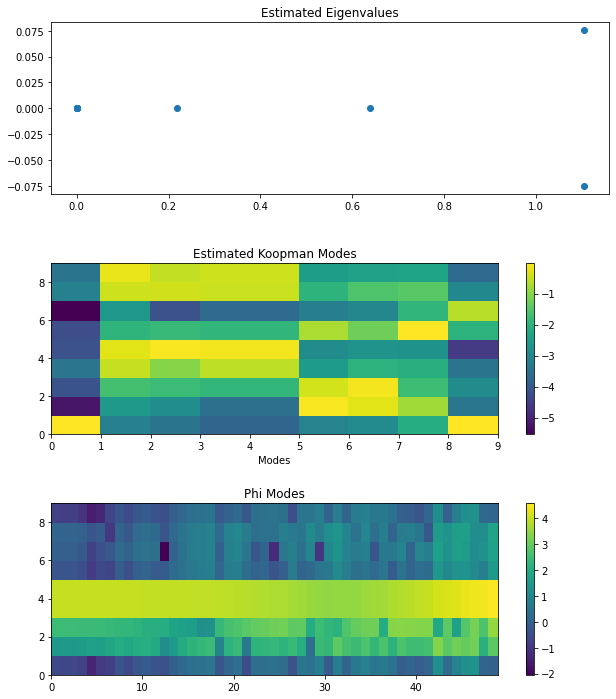

In [123]:
fig = plt.figure(figsize=(10,12))
plt.subplot(311)
plt.scatter(eigenvalues.real, eigenvalues.imag)
plt.title('Estimated Eigenvalues')

plt.subplot(312)
plt.pcolor( np.array(np.log10(np.abs(eigenvectors))),cmap='viridis')
plt.colorbar();
plt.title('Estimated Koopman Modes')
plt.xlabel('Modes')

plt.subplot(313)
plt.pcolor( np.array(np.log10(np.abs(temporal_modes.T))),cmap='viridis')
plt.colorbar();
plt.title('Phi Modes');
plt.subplots_adjust(hspace=0.4)

We can see from the phi modes above that very specific eigenvectors drive the overall dynamics, specifically eigenvectors 4 and 5, followed by eigenvectors 1 and 2. 

In [124]:
def reconstruction(eigenvectors, eigenvalues, initial_conditions, data_average, max_time):
    rows = eigenvalues.shape[0]
    columns = max_time
    recon = np.zeros((rows,columns))
    
    for i in range(max_time):
        magnitudes = initial_conditions *eigenvalues**i
        recon[:,i] = np.dot(eigenvectors, magnitudes)
    recon_average = recon + data_average
    
    return recon_average

<ipython-input-124-ffad0e3f7994>:8: ComplexWarning: Casting complex values to real discards the imaginary part
  recon[:,i] = np.dot(eigenvectors, magnitudes)


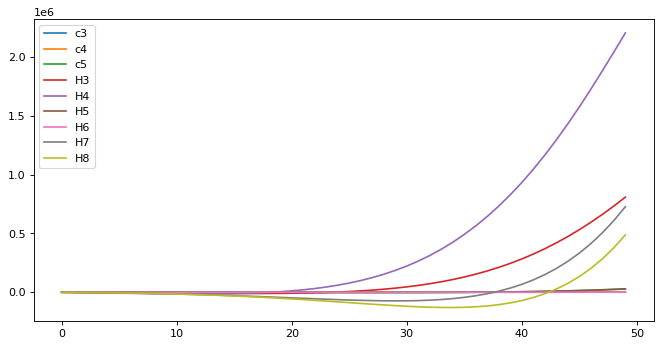

In [125]:
recon = reconstruction(eigenvectors, eigenvalues, temporal_modes[0,:], data_average, 50)

plt.figure(num=None, figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
for i in np.arange(recon.shape[0]):
    plt.plot(np.arange(50),recon[i,:])
labels = ['c3', 'c4', 'c5','H3', 'H4', 'H5' ,'H6','H7','H8' ] 
plt.legend(labels)

Movarraei, Nazanin & Boxwala, Samina. (2016). On the Number of Cycles in a Graph. Open Journal of Discrete Mathematics. 6. 41-49. 10.4236/ojdm.2016.62005. 

Ly, Ryan. A data-driven study of random graphs and social networks. 2020